In [3]:
import tensorflow as tf
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import log_loss
import numpy as np
import pickle
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import explained_variance_score, mean_squared_error

In [4]:
#Load MNIST data from tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)
# mnist_one_hot = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
train_images = mnist.train.images
train_labels = mnist.train.labels
test_images = mnist.test.images
test_labels = mnist.test.labels

In [6]:
def trainRandomForest(index):
    model = RandomForestClassifier(n_estimators=index,n_jobs=4)
#     print index
#     model.random_state(index)
    model.fit(train_images, train_labels)
    return model

models = {}
for i in [3,25,77,99]:
    print i
    model = trainRandomForest(i)
    models[i] = model

# joblib.dump(models, 'random_forest_models.pkl')
# print models

3
25
77
99


## Plot of Uncertainty:
To plot the uncertainty, we get the probabilities of a test image being classified into each class, i.e, for every image, we determine 10 probability values, each representing the probability of the test image being classified into the respective class.

To plot the histogram, we determine the indices of each of the 10 types of digit in the test data set and then plot the probability of each type of image being classified correctly.

In other words, the x-axis of the histogram plot represents the probability that a digit is correctly classified into their respective classes and y-axis represents the number of observations that fall under these probabilities.

For example, in the plot using a model with 3 members, we observe that the digit labeled 'one' has the largest number of observations that achieve a probability of being correctly classified with a probability of 0.9-1.0.

In [5]:
def plot_uncertainty(model,test_images,test_labels):
    predicted_output = model.predict_proba(test_images)
    
    zero = np.where(test_labels == 0)[0]
    one = np.where(test_labels == 1)[0]
    two = np.where(test_labels == 2)[0]
    three = np.where(test_labels == 3)[0]
    four = np.where(test_labels == 4)[0]
    five = np.where(test_labels == 5)[0]
    six = np.where(test_labels == 6)[0]
    seven = np.where(test_labels == 7)[0]
    eight = np.where(test_labels == 8)[0]
    nine = np.where(test_labels == 9)[0]
    fig, ax = plt.subplots(1,figsize=(8,6))
    
    ax.hist(predicted_output[zero, 0], histtype='step', label='zero')
    ax.hist(predicted_output[one, 1], histtype='step', label='one')
    ax.hist(predicted_output[two, 2], histtype='step', label='two')
    ax.hist(predicted_output[three, 3], histtype='step', label='three')
    ax.hist(predicted_output[four, 4], histtype='step', label='four')
    ax.hist(predicted_output[five, 5], histtype='step', label='five')
    ax.hist(predicted_output[six, 6], histtype='step', label='six')
    ax.hist(predicted_output[seven, 7], histtype='step', label='seven')
    ax.hist(predicted_output[eight, 8], histtype='step', label='eight')
    ax.hist(predicted_output[nine, 9], histtype='step', label='nine')

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=True, shadow=True)
    
    ax.set_xlabel('Prediction (Classes probability)')
    ax.set_ylabel('Number of observations')

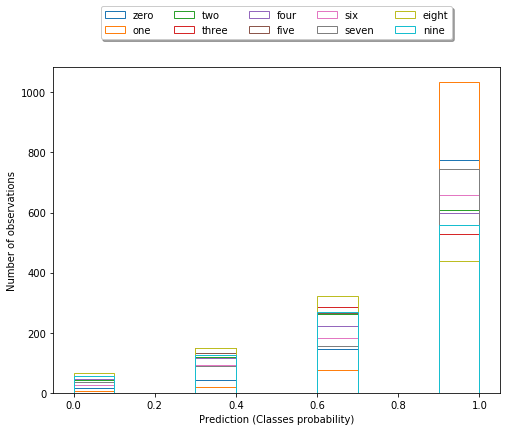

In [6]:
plot_uncertainty(models[3],test_images,test_labels)

We now make histogram plots to observe the uncertainty when using models with an increasing number of members. The following figure shows the plot for a model with 25 members:

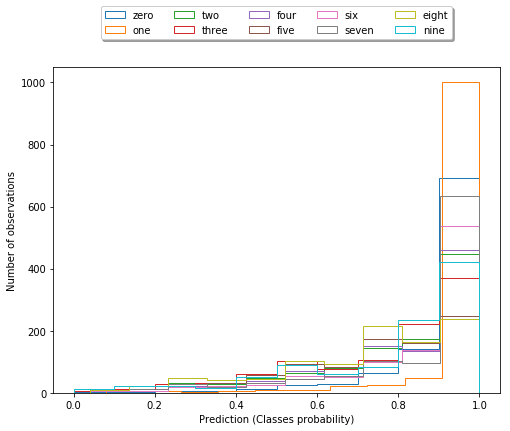

In [7]:
plot_uncertainty(models[25],test_images,test_labels)

With an increase in the number of members, there are a lower number of images with a lower probability of being classified to an incorrect class. In addition, number of images of each type have an increasingly higher probability of being classified correctly. 

The following figure shows a histogram plot when using a model with 77 members. 

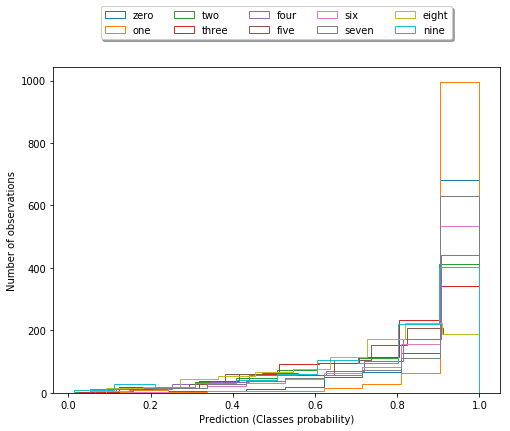

In [8]:
plot_uncertainty(models[77],test_images,test_labels)

Increasing the number of members to 77 causes the plot to show a similar change as in the previous plot, but on a much lower scale. In other words, while the number of images with a higher probability score for their correct classes has increased for each type, the scale of this increase is not as high as seen when increasing the number of members from 3 to 25.

Similar results are seen when increasing the number of members from 77 to 99 as shown in the histogram plot below.

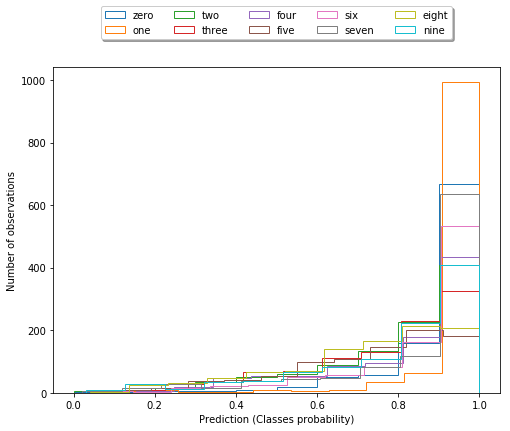

In [9]:
plot_uncertainty(models[99],test_images,test_labels)

Comparison of the accuracy scores (shown below) shows that the accuracy increases with the increase in the number of members.

In [10]:
print models[25].score(test_images,test_labels)

0.9618


In [11]:
print models[77].score(test_images,test_labels)

0.9685


In [12]:
print models[99].score(test_images,test_labels)

0.9702


Thus accuracy increases and the uncertainty decreases with an increase in the number of members in the ensemble.

In [28]:
predicted_output = models[25].predict_proba(test_images)
pred_labels = models[25].predict(test_images)

misclassified = np.where(test_labels != pred_labels)
mis_classified = np.asarray(misclassified)[0]

The above code obtains the indices of the test images that were wrongly classified as well as the predicted probabilities when using a model with 25 members. To analyze the reason for missclassification, we take the true labels and the predicted probabilities for the first 5 misclassified examples:

In [49]:
true = []
prediction = []
pred_prob = []
for i in range(5):
    idx = mis_classified[i]
    true.append(test_labels[idx])
    prediction.append(pred_labels[idx])
    pred_prob.append(predicted_output[idx])

print "True labels for first 5 misclassified examples :"
print true
print "Predicted labels for first 5 misclassified examples :"
print prediction

True labels for first 5 misclassified examples :
[7, 9, 4, 7, 9]
Predicted labels for first 5 misclassified examples :
[9, 7, 9, 4, 8]


In [50]:
print "Predicted probabilities for first 5 misclassified examples :"
for i in range(5):
    idx = mis_classified[i]
    print predicted_output[idx]

Predicted probabilities for first 5 misclassified examples :
[0.   0.   0.08 0.12 0.08 0.04 0.   0.2  0.04 0.44]
[0.   0.   0.04 0.   0.04 0.   0.   0.4  0.28 0.24]
[0.04 0.   0.   0.04 0.36 0.08 0.   0.   0.   0.48]
[0.   0.   0.   0.   0.4  0.12 0.   0.28 0.   0.2 ]
[0.04 0.   0.2  0.16 0.   0.08 0.04 0.   0.32 0.16]


It can be observed from the above probabilities that the actual label for an image has been assigned a lower probability as compared to the true label. For instance, the first misclassified image has the highest probability of 0.44 assigned to label 9 whereas the true label for the image ,i.e 7 has only a probability of 0.2. Similaryly for the second misclassified example, a higher probability is assigned to label 7 as compared to the true label 9. The same holds true for the remaining misclassified examples as well. 

## Reproduction of figure from paper using Random forest

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


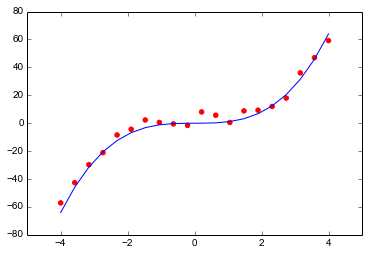

In [3]:
# Generating samples between -4 and 4 for training
num_of_data = 20
x = np.linspace(-4,4,num_of_data)

# Generating noise with mean 0 and standard deviation 3^2
noise = np.random.normal(0,3,num_of_data)

# Generating output and adding noise
y = x**3
y_noise = y + noise

# Plotting
plt.plot(x,y)
plt.scatter(x,y_noise,color="red")

In [4]:
# Training model with 10 members in ensemble
sinmodel = RandomForestRegressor(n_estimators=10,n_jobs=4)
sinmodel.fit(x.reshape(20,1),y.reshape(20,1))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, compute_importances=None,
           criterion='mse', max_depth=None, max_features='auto',
           min_density=None, min_samples_leaf=1, min_samples_split=2,
           n_estimators=10, n_jobs=4, oob_score=False, random_state=None,
           verbose=0)

In [5]:
# Generating test samples
test_x = np.linspace(-6,6,20)
test_y = test_x**3

In [6]:
# Predicting the test samples
test_predict = sinmodel.predict(test_x.reshape(20,1))

In [35]:
# function to find the upper and lower error bounds for the predicted values
def find_bounds(model, X, percentile=95):
    err_down = []
    err_up = []

    for x in range(len(X)):
        preds = []
        for pred in model.estimators_:
            preds.append(pred.predict(X[x])[0])
        err_down.append(np.percentile(preds, (100 - percentile) / 2. ))
        err_up.append(np.percentile(preds, 100 - (100 - percentile) / 2.)) 

    return err_down, err_up

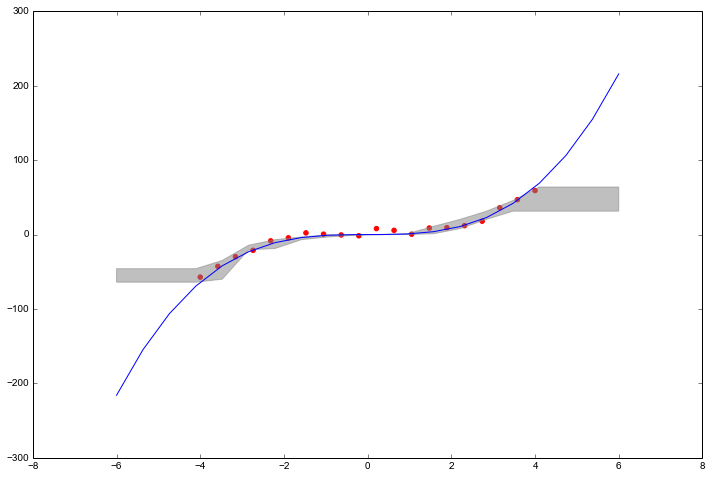

In [38]:
lower,upper = find_bounds(sinmodel,test_x)
plt.figure(figsize=(12,8))
plt.plot(test_x,test_y)
plt.scatter(x,y_noise,color="red")
plt.fill_between(test_x, lower, upper, color='grey', alpha=0.5)

In the above plot, the blue line represents the ground truth, with the red dots representing noisy training data points.

http://www.statisticshowto.com/probability-and-statistics/confidence-interval/

https://blog.datadive.net/prediction-intervals-for-random-forests/